# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


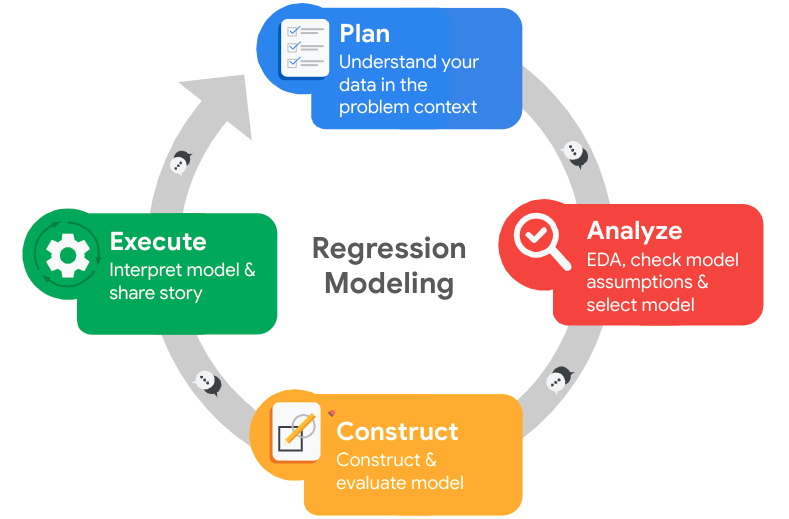

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Response**

* The stakeholders for this project includes
    - Salifort's senior leadership team: They are responsible for setting the direction of the company
    - Salifort's Human Resource Department: They are responsible for conducting employee survey, collecting turn over data and implementing retention strategies
    - Employees: While not directly involved in the project, employees are indirectly affected by turnover rates and the company's efforts to improve retention. 
    - Other Stakeholders: This includes other data professional in my department whom I will be working with answer the business problem.

* What are you trying to solve question refers to what is the goal of this project? Which is to develop a predictive model that can anticipate employee turnover at Salifort Motors based on relevant data points such as job title, department, number of projects, and average monthly hours. 

* Initial observations of the data reveals no missing values in the data set. Additionally, there doesn't appear to be any data integrity issues or unreasonbale values in the any of the data points. Although, I find it interesting that performance and satisfaction levels value ranges from 0-1 (to be explored further)

* I find myself refering to my notebooks, online resources, library documentations, and other relevant resouces.

* Yes, I have some ethical consideration in this stage: 
    - Data privacy and security:
    - Bias and fairness: 
    - Anonymization and aggregation: Though this is an issue with the project as the data doesn't include PI's. However it is important to keep in mind.
    - Informed consent: If I am consulted in the designing surveys or collecting employee data, I must ensure that employees provide informed consent to participate in the survey and understand how their data will be used.
    - Transparency: To clearly state the methods and potential limitations of the model.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score


# logistic regression
from sklearn.linear_model import LogisticRegression

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For saving model
import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("../data/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = (df0
       .rename(columns={"average_montly_hours": "average_monthly_hours",
                       "time_spend_company": "tenure"})
       .rename(str.lower, axis="columns"))
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

* The data does not contain any missing values. This is great.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

* There are 3008 duplicated instances in the dataset.

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicated_rows = df0[df0.duplicated()]
duplicated_rows.head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

* The above output shows the head rows that are duplicated in the dataframe. 
How likely is it that these are legitimate entries? hmmmm! Doesn't seems very likely with several continuous variables across 10 columns. It seems unlikely that these observations are legitimate.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
print(f"Shape before dropping duplicate: {df0.shape}")
df1 = df0[~df0.duplicated(keep='first')]

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(f"Shape after dropping duplicate: {df1.shape}")
df1.head()

Shape before dropping duplicate: (14999, 10)
Shape after dropping duplicate: (11991, 10)


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

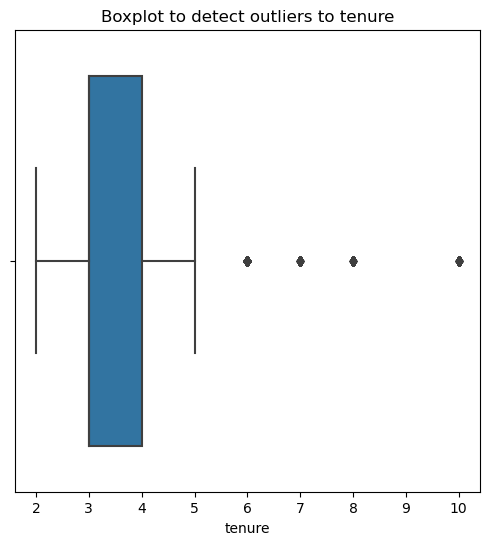

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title("Boxplot to detect outliers to tenure")
sns.boxplot(data=df1, x="tenure")
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df1.loc[df1["tenure"] > 5].head()

satisfaction_level  last_evaluation  number_project  \
1                 0.80             0.86               5   
17                0.78             0.99               4   
34                0.84             0.87               4   
47                0.57             0.70               3   
67                0.90             0.98               4   

    average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
1                     262       6              0     1                      0   
17                    255       6              0     1                      0   
34                    246       6              0     1                      0   
47                    273       6              0     1                      0   
67                    264       6              0     1                      0   

     department  salary  
1         sales  medium  
17        sales     low  
34           hr     low  
47      support     low  
67  product_mng  medium

* From the boxplot, it can be determined that `tenure` greater 5 years is an outlier.  Of the entire dataset, 824 rows contain this outlier. It is worth investigating these rows further, because at first glance, it is not unreasonable for an employee to have more than 5 years tenure at a company. More importantly in the context of the business problem (high employee turnover), this rows can be consider to be survey response from 'loyal' employes whose views can be help address the problem. I will return to this part of the analysis at the contruct phase.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [13]:
# Determine the number of rows containing outlier

def find_boundaries(df: pd.DataFrame, variable: str, distance:int = 1.5)-> tuple:
    """Find the boundary of a variable distribution"""
    
    # Compute the 25th percentile in `variable`
    percentile25 = df[variable].quantile(0.25)
    
    # Compute the 75th percentile in `variable`
    percentile75 = df[variable].quantile(0.75)
    
    # Compute the interquatile values in `variable`
    iqr = percentile75 - percentile25
    # Define the upper and lower boundary
    lower_boundary = percentile25 - distance*iqr
    upper_boundary = percentile75 + distance*iqr
    print(f"Lower limit: {lower_boundary}")
    print(f"Upper limit: {upper_boundary}")
    
    return lower_boundary, upper_boundary

# Determine the limit for non-outlier values in `tenure`
upper_limit, lower_limit = find_boundaries(df1, "tenure")

# Subset the data containing outliers in tenure
outliers_tenure = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers_tenure))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 11991


# PACE: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Response**

- There is no linear relationship between any of the variables. There does exist positive corrlation between average monthly hours, number of project and evaluation scores. Left variable and satisfaction levels are negatively correlaed.
- I have not performed any transformation of variables at this stage.
- EDA is great to learn patterns, trends relationship in the dataset. That way we get to asked the right questions.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_of_people_who_left = df1["left"].value_counts()
print(f"The number of employees who left: {num_of_people_who_left[1]}")
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percent_left = df1["left"].value_counts(normalize=True)
print(f"The percentage of employees who left: {percent_left[1] * 100:.3}%")

The number of employees who left: 1991
The percentage of employees who left: 16.6%


In [15]:
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

* What are the variables I am interested in?

`satisfaction_level`, `number_project`, `tenure`, `department`, `salary`, `average_monthly_hours`

1. **Boxplot** are very useful in visualizing distributions within data. Compare distributions of numerical variables between employees who stayed and those who left
    
    `average_monthly_hours` vs `number_project`.
    
    `tenure` vs `satisfaction_level`
    
    
2. **Histogram**: Graphical representation of a frequency distribution, which shows how frequently each value in a dataset or variable occurs. For example, plot of a stacked histogram to visualize the distributions of employees who stayed versus those who left.

    `number_project` vs `left`
    `department` vs `left`
    

3. **Scatterplot**: A scatter plot is a type of plot that displays values for two variables as points on a Cartesian plane. It's useful for visualizing the relationship between two continuous variables.

    `average_monthly_hours` vs `satisfaction_level`
    
    `average_monthly_hours` vs `last_evaluation`
    
    `average_monthly_hours` and `promotion_last_5years`

* Relationship between `satisfaction_level` and `salary`
* Relationship between `satisfaction_level` and `department`


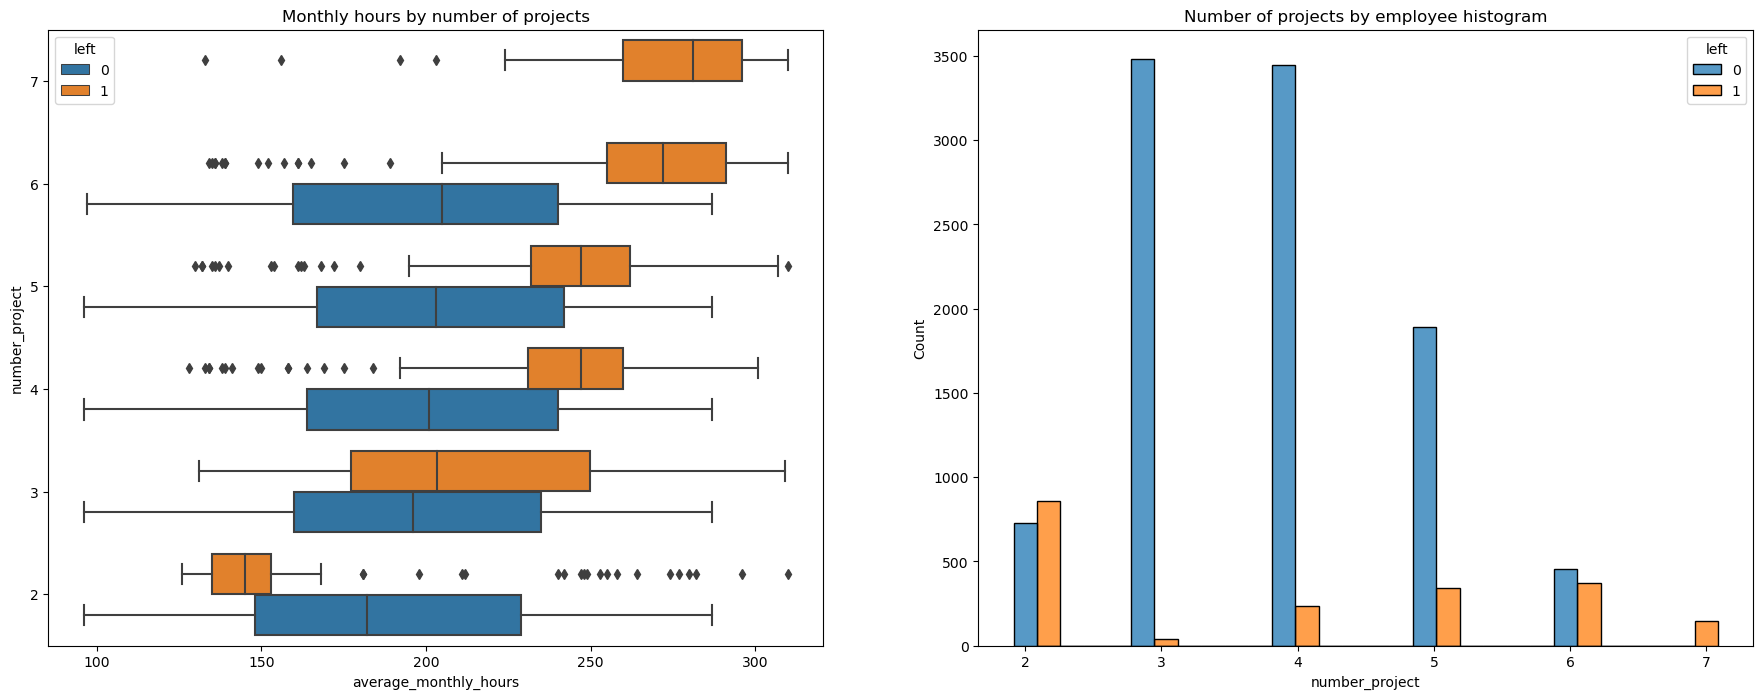

In [16]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create the boxplot showing `average_monthly_hours` distribution for `number_project`
sns.boxplot(data=df1, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Monthly hours by number of projects")
ax[0].invert_yaxis()

# Create a histogram showing distribution of `number_project`, comparing those who `left`.
tenure_stay = df1.loc[df1["left"] == 0, "number_project"]
tenure_left = df1.loc[df1["left"] == 1, "number_project"]
sns.histplot(data=df1, x="number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()

It is expected that people who work on more projects would also work for longer hours. This appear to be the case here, with the mean values of each group (stay and left) increasing with the number of projects worked. However, a few things stand out from the plot above:

1. There are two groups of employees who left the company: Group A, those who worked less than their peers with the same number of projects and Group B, those who worked much more. Of those of group A, could it be that they were fired? For those from group B, they contributed to projects more than their peers, it is very unlikely they were fired. It is reasonable to infer they probably resigned their appointment.

3. The optimal number of projects for employees to work on seesms to be 3-4. The ratio of left and stay is very small in this group.

3. If I assume a work week of 40 hours and 2 weeks of vacation per year, then the average number of working hours per month of employees working Mondary-Friday ``= 49 weeks * 40 hours per week /12 months = 166.67 hour per month`. This means that aside from the employee who worked on two projects, every group worked considerable more hours than 'noral average ~167 hours per month'. This seems that employees here are overworked.

4. Everyone within 7 projects left the company, and the interquartile ranges of this group and those who left with 6 projects was ~244-295 hours/month -- much more than any other group. The average monthly hours from these groups (6 and 7 projects) was ~230-276 hours per month.


As a next stop,  I would like to investigate by how many percent did employee with 6 and 7 project overworked compared to the aveage working hours per month in the company. And confirm that all employee with seven projects left.

In [17]:
avg_monthly_hours_7projects = df1.loc[df1["number_project"] == 7, "average_monthly_hours"].mean()
print(f"Mean monthly hours for employees with 7 project: {avg_monthly_hours_7projects}")
avg_monthly_hours_6projects = df1.loc[df1["number_project"] == 6, "average_monthly_hours"].mean()
print(f"Mean monthly hours for employee with 6 project: {avg_monthly_hours_6projects}")

avg_monthly_hours_for_all = df1["average_monthly_hours"].mean()
print(f"Mean monthly hours for employee with less than 6 projects: {avg_monthly_hours_for_all}")


def calulate_overwork(work_hrs: float, normal_hrs:int=200)->float:
    """Compute overworked hours in percentage."""
    abs_difference = abs(work_hrs - normal_hrs)
    average_hours = (work_hrs + normal_hrs)/2
    percent_diff = abs_difference/average_hours * 100
    return round(percent_diff,2)

print(calulate_overwork(avg_monthly_hours_7projects))
print(calulate_overwork(avg_monthly_hours_6projects))

Mean monthly hours for employees with 7 project: 275.62068965517244
Mean monthly hours for employee with 6 project: 230.39225181598064
Mean monthly hours for employee with less than 6 projects: 200.4735218080227
31.8
14.12


This confirrms that employees with 6 and 7 projects worked 14% and 31% more than the avearge monthly hours  in the company. They indeed over worked.

In [18]:
# Get the values of stayed/left for employees with 7 projects
df1.loc[df1["number_project"] == 7, "left"].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with seven project did leave

Next, I would examine the relationship between `average_monthly_hours` vs `satisfaction_level` 

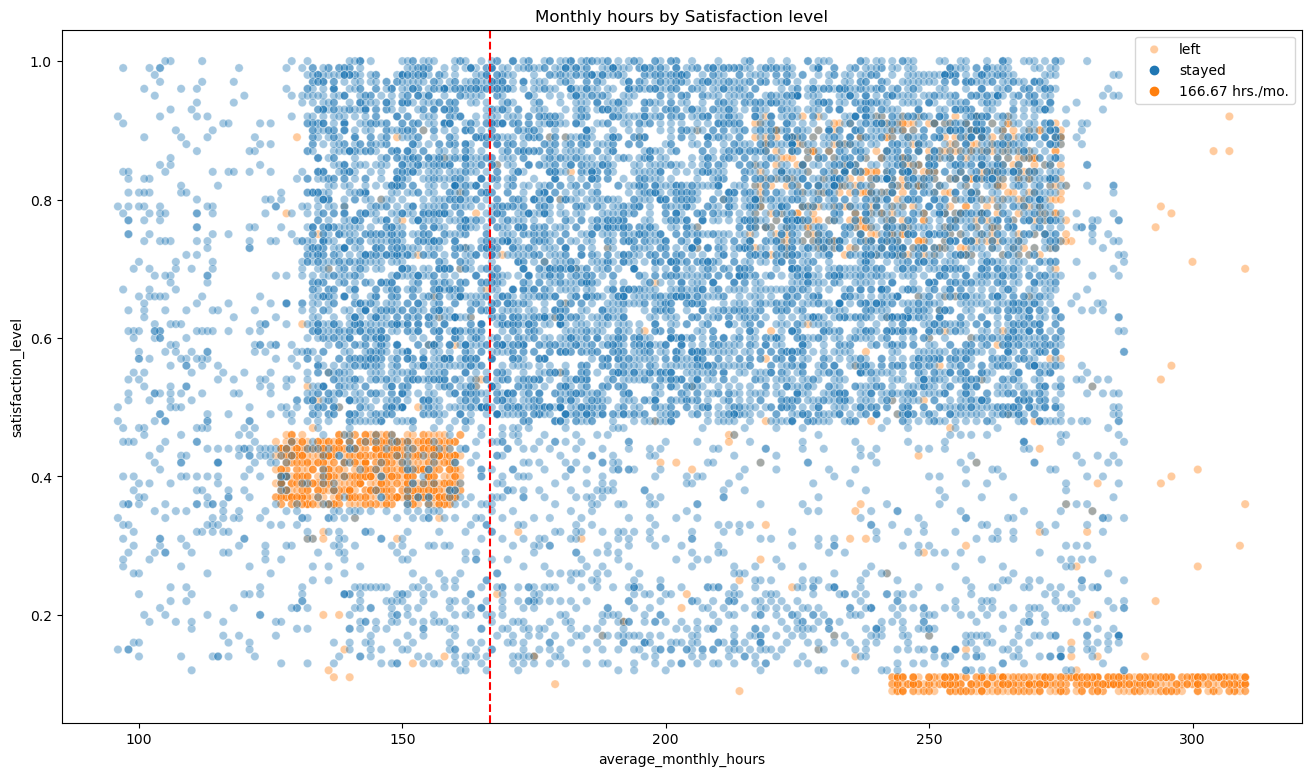

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", label="166.67 hrs./mo.", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Monthly hours by Satisfaction level");

At first glance I thought the shape of the scatterplot is kinda strange. Upon doing some research, I found this could be an indication of sythentic data (Surprise). 

The scatterplot shows that there was sizeable group of employees who worked ~240-315 hours per month. 315 hours per month is equivalent to over 75 hours per week for a whole year. It is likely why their satisfaction level is close to zero and have all left the company.

Curiously, the plot shows another group of employees who left, those who had more normal hours (less than 166.67 hrs/mo). Their satisfaction level was close below average (close to 0.4). What could be a reasonable explanation for this? Could it be that they are not trusted with enough responsibility? Could they be a different category of employee with peculier contracts? Maybe they are are employees under pressue seeing that their colleages work more.


Next, visaulize the relationship between `tenure` vs `satisfaction_level`

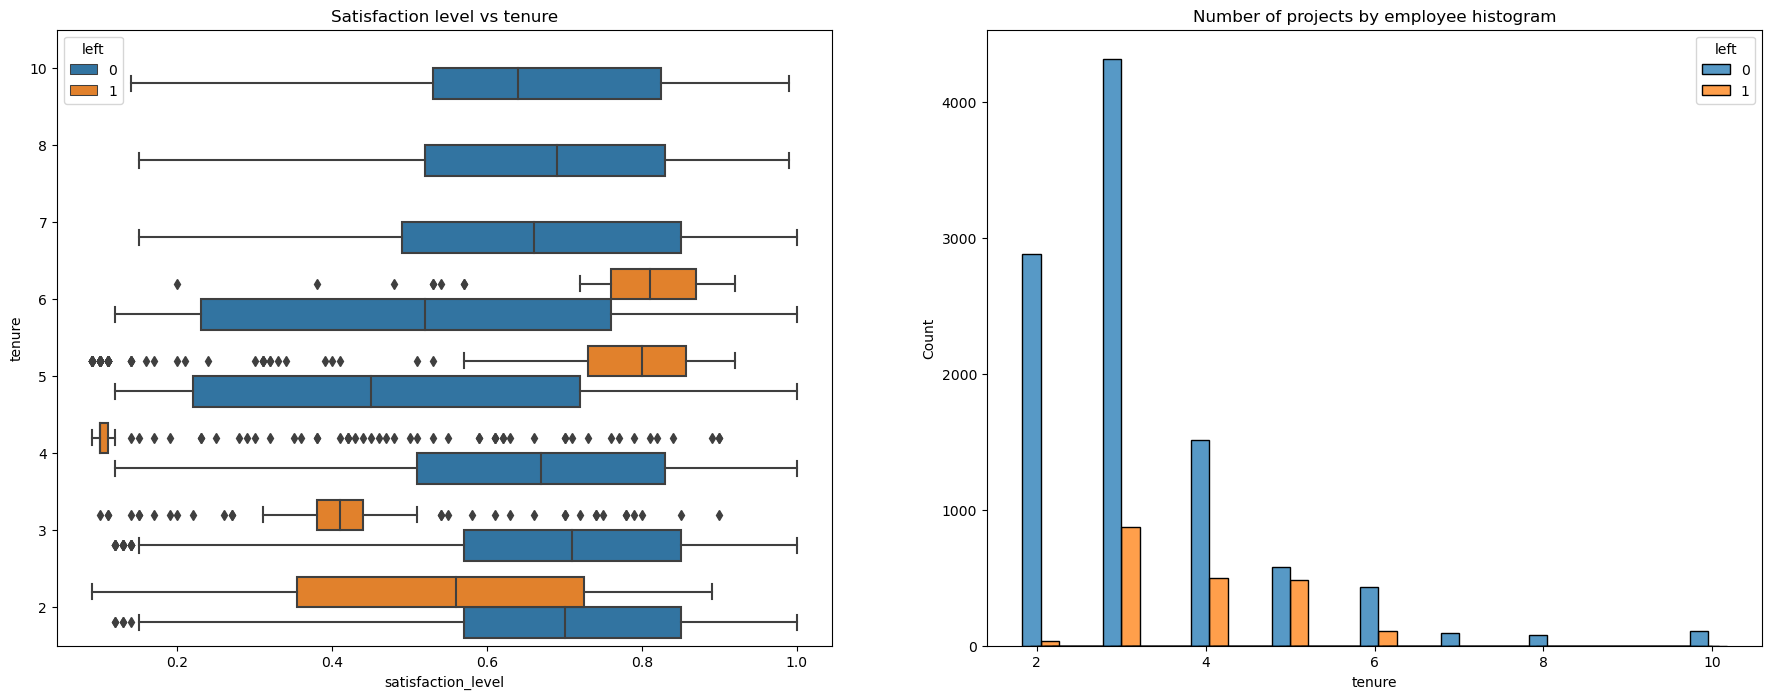

In [20]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create the boxplot showing `average_monthly_hours` distribution for `number_project`
sns.boxplot(data=df1, x="satisfaction_level", y="tenure", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Satisfaction level vs tenure")
ax[0].invert_yaxis()

# Create a histogram showing distribution of `number_project`, comparing those who `left`.
tenure_stay = df1.loc[df1["left"] == 0, "number_project"]
tenure_left = df1.loc[df1["left"] == 1, "number_project"]
sns.histplot(data=df1, x="tenure", hue="left", multiple="dodge", shrink=5, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()


There are many observation I made from this plot
* Majority of the employee who left the company happened in the first 2 years.
* The longest serving employees didn't leave.  There satisfaction level aligns with newer employees who stayed
* The historgram shows that there are relatively few longer-tenured employees. It's possible that they're the management employees, or higher-paid employees. **Would like to confirm this assumption by exploring the relationship between salary and tenure.** 
* Employees who left after the forth year, seems to have an unusual low satisfaction level. It is worth investigating changes to company policy that might have affected poeple's satistfaction at the 4-years mark.
* Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.


Next step is to analyze, would be to check the mean and media of the statisfaction level of employees who left

In [21]:
df1.groupby(["left"])["satisfaction_level"].agg([np.mean, np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Well, no surprises, employee who left have lower mean and median satisfaction level compared to employee who stayed. An interesting observation amongs the employee who stayed is that their mean satisfaction level is less than the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left or negatively skewed. This mean there are more small values that are pulling the mean down, causing it to be lower than the mean.

Next, explore the relationship between `salary` and `tenure`

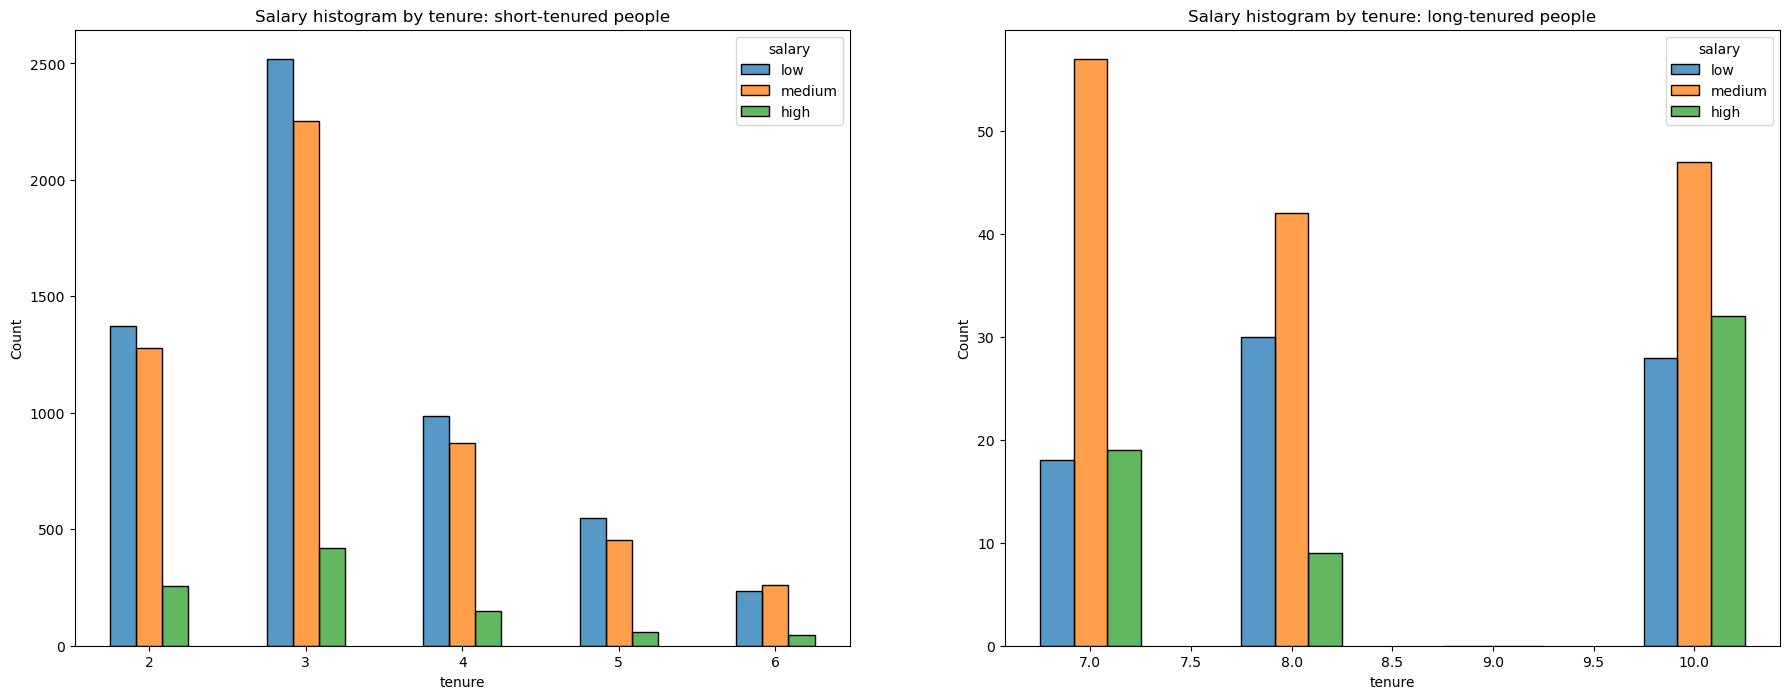

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short tenure
tenure_short = df1[df1["tenure"] < 7]

# Define long tenure
tenure_long = df1[df1["tenure"] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x="tenure", hue="salary", discrete=1, hue_order=["low", "medium", "high"],
            multiple="dodge", shrink=0.5, ax=ax[0])
ax[0].set_title("Salary histogram by tenure: short-tenured people")

sns.histplot(data=tenure_long, x="tenure", hue="salary", discrete=1, hue_order=["low", "medium", "high"],
            multiple="dodge", shrink=0.5, ax=ax[1])
ax[1].set_title("Salary histogram by tenure: long-tenured people");

There is no dispprotionately number of long tenured employee on high salary. In fact there are more medium salaried long tenured employee.

It is also interestin to see from this histogram that employees categorized as short-tenured receive high salaries. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of average_monthly_hours versus last_evaluation.

Text(0.5, 1.0, 'Scatterplot of monthly hours by last evaluation score')

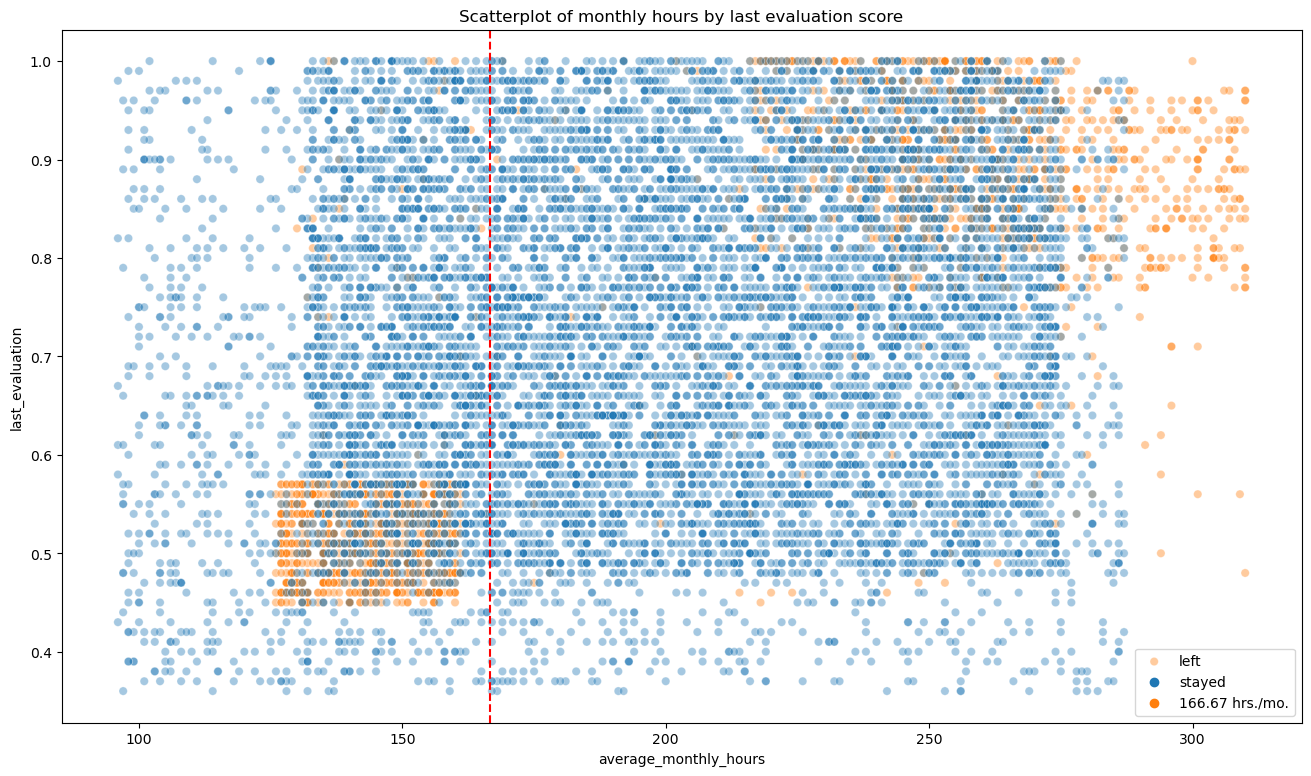

In [23]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x="average_monthly_hours", y="last_evaluation", hue="left", alpha=0.4)
plt.axvline(x=166.67, label="166.67 hrs./mo.", color="red", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Scatterplot of monthly hours by last evaluation score")

The following observation can be made from the scatterplot above:

* The scatterplot indicates two groups of employees who left: overworked employee who performed very well and employee who worked slightly below norminal monthly average of 166.67 with lower evaluation scores.
* There seems to be a correlation between hours worked and last evaluation
* Most of the employee in this company worked well above the norminal 166.67 hours per month.
* The plot also shows that working long hours doesnt gaurantee good evaluation.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

Text(0.5, 1.0, 'Monthly hours vs promotion last 5 years')

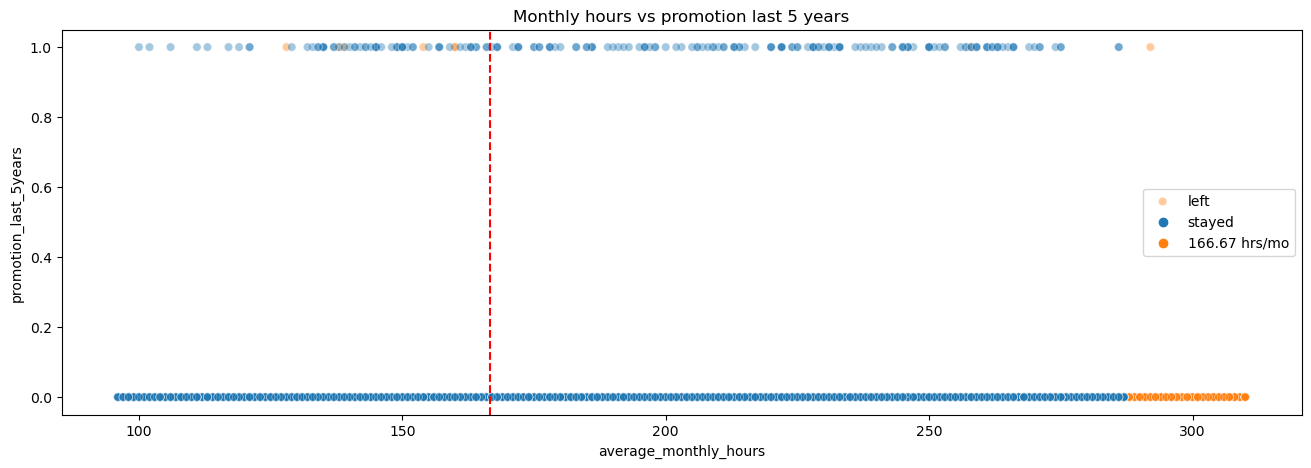

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
sns.scatterplot(data=df1, x="average_monthly_hours", y="promotion_last_5years", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs/mo"])
plt.title("Monthly hours vs promotion last 5 years")

The plot shows the following:

* Very few employee was promoted in the last five years
* Very few employee who worked for most hours where promoted
* All employees who left were working longest hours.

Next, let inspect how the employees who left are distributed across departments

In [25]:
df1["department"].value_counts()


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

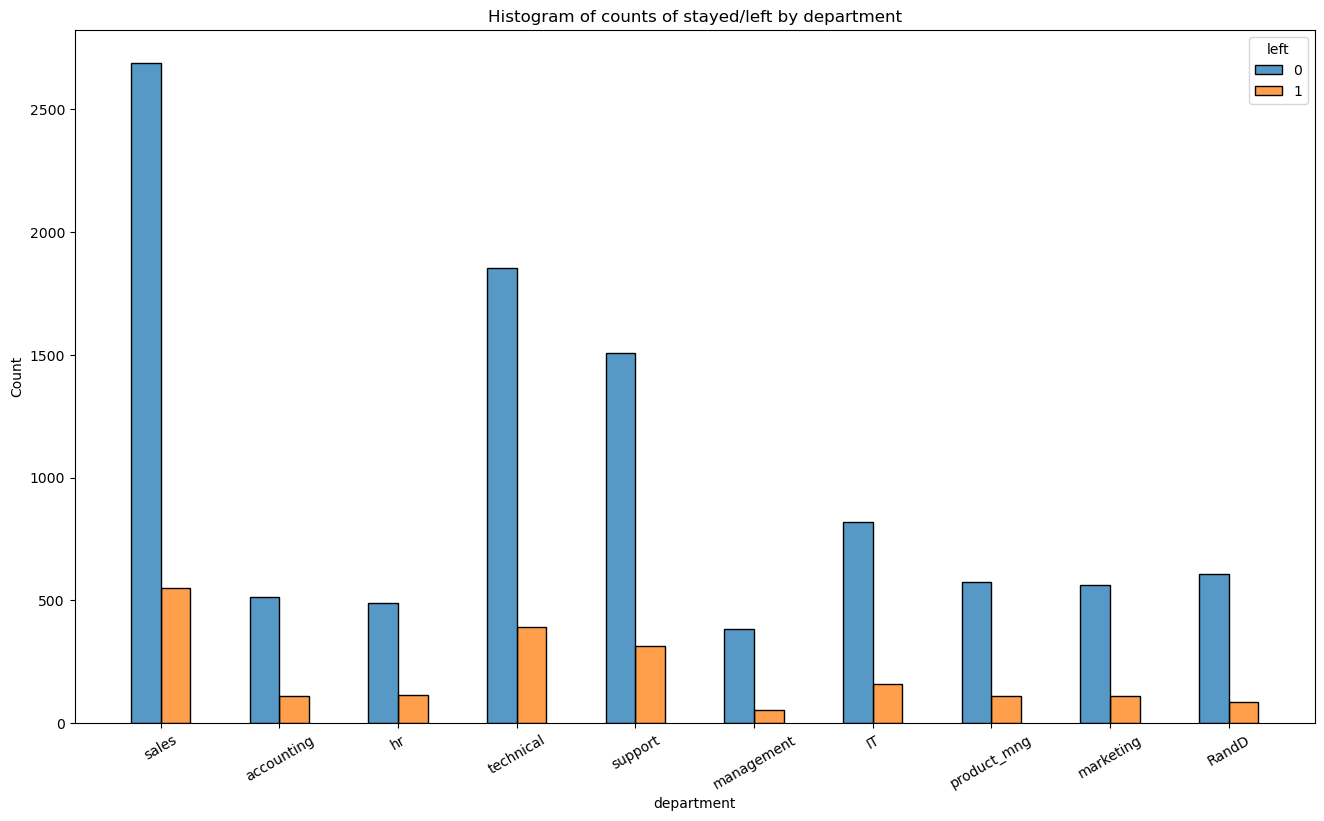

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a histogram to compare department distribution of employee who left

plt.figure(figsize=(16, 9))
sns.histplot(data=df1, x="department", hue="left", discrete=1, 
             hue_order=[0,1], multiple="dodge", shrink=0.5)
plt.xticks(rotation=30)
plt.title("Histogram of counts of stayed/left by department");



There doesn't seems to be any department that differs significantly in its proportion of employee who left to those who stayed.

Lastly, lets check for the strong correlaltion between variables in the data

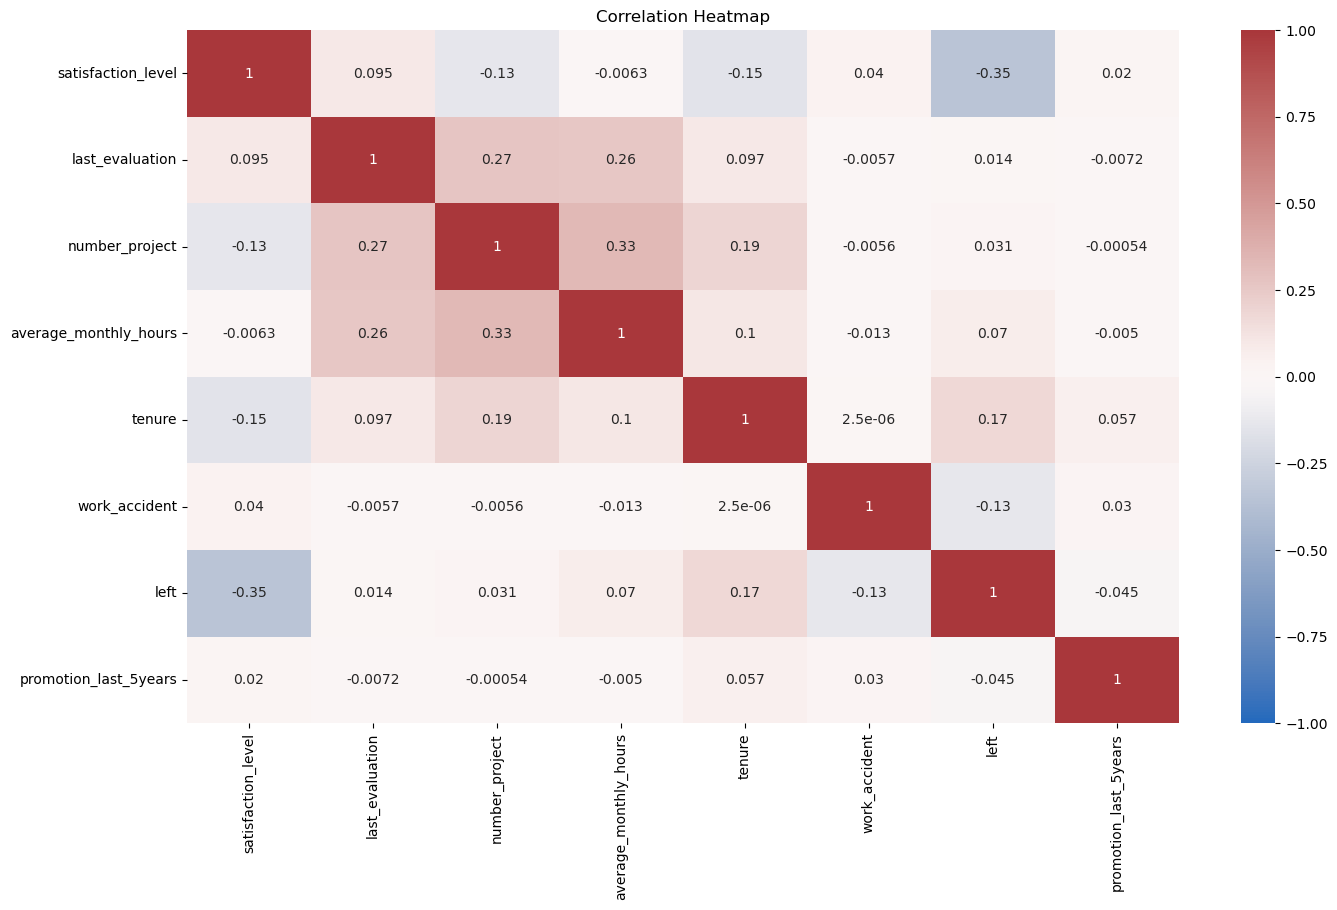

In [27]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, 
                      annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap");

The heatmap confirms that `last_evaluation`, `number_project`, `average_monthly_hour` all have a positive correlation with each other, whether an employee leaves is negatively correlated with `satisfaction_level`. Likewise, `tenure` and `satisfaction_level` is negatively correlated.

### Insights

From EDA, it's clear employees leaving the company is tied to longer worker hours, many projects and generally lower level of satisfaction. It is demoralizing to work for longer hours or multiple promotion wihout any additional insentives such as promotions or good evaluation scores.

Judging by the amount of employees working increasing longer working hours, I would infer that there is a considerable number of employees who are probably burn out.

Finally, employes with longer than 5 years tenure tends to remain with the company.

Overall, there is a case to be made about miss management at this company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task is a classification type. It involves binary classification, since the outcome variable `left` can be either 1(left) or 0 (Stayed)

### Identify the types of models most appropriate for this task.

Since this a classification problem, either Logistic Regression or Tree base machine learning model(Decision Tree, RandomForest, Xgboost) would be appropiate.

### Modeling A: Logistic Regression Model

This approach covers the use of logistic regression model.  More specifically, binomial logistic regression is suited for this task as the outcome variable is binary.

 ##### Steps
* The validation step of EDA. We have performed the clearning and structuring aspect of EDA in the cell above
* [Encode non-numerical variables.](#encode)

* [Check that the data meets some model assumptions](#outlier)
    - check for correlation within variables
    - address outlier
* [Modeling](#modeling)
    - Seperate the outcome variable `y`
    - Select the feature to be model `X`
    - Split data to train and test set
    - Fit the model
    - Evaluate the model
    - Check assumptions.

In [28]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

<a id='encode'></a>
* `department` is a categorical feature, which means it must be dummied for modelling.

* `salary` is categorical but it's ordinal i.e. the categories have a natural order. In this case, low, medium and high. Better  not to dummy this column but rather to convert the levels to numbers 0-2.


##### Save the data


In [29]:
# Save this dataset to csv
df1.to_csv("../data/cleaned_hr_dataset.csv", index=False)

In [30]:
df_encoded = df1.copy()

# Encode the Salary variable as an ordinal numeric category
ordinal_mapping = {"low": 0,"medium": 1, "high": 2}
df_encoded["salary"] = df_encoded["salary"] .map(ordinal_mapping)

# Dummy encode the `department` column
df_encoded = pd.get_dummies(df_encoded, drop_first=False)
df_encoded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Create a heatmap to visualaize how correlated variables are.
What variables am I interested in examining correlation between ?


Text(0.5, 1.0, 'Heatmap of the selected variables in the dataset')

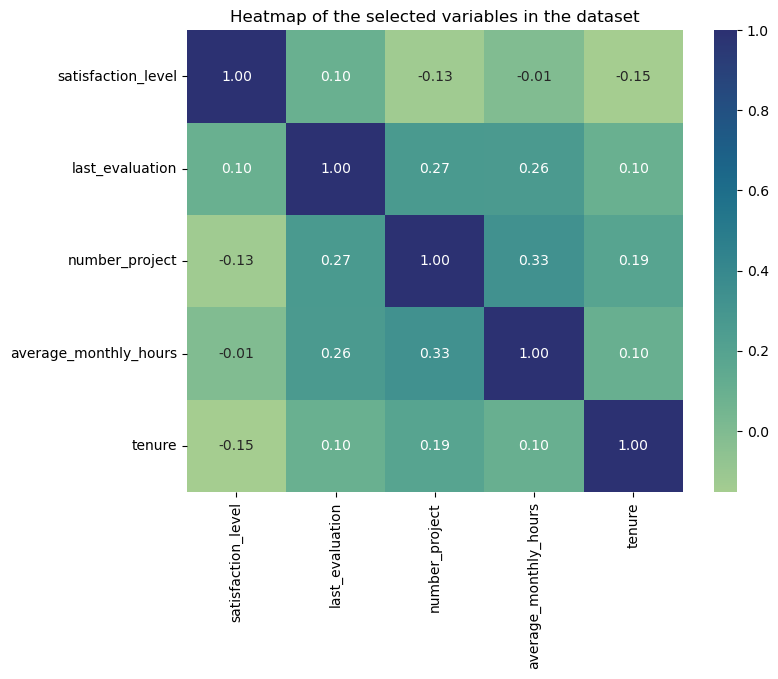

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "tenure"]].corr(), annot=True, fmt=".2f", cmap="crest")
plt.title("Heatmap of the selected variables in the dataset")

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Taking that assumption into consideration, from the heatmap the pair of variables with the highest correlation coefficient are `num_project` and `average_monthly_hours`(0.33) followed by `last_evaluation` and `num_project`. These are positive correlations however they are not strongly correlated. Therefore we satisfy the assumptions to build the logistic regression. We can proceed to the next step.

<a id="outlier">Outlier</a>


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to address the outlier found in the `tenure` column of our dataset

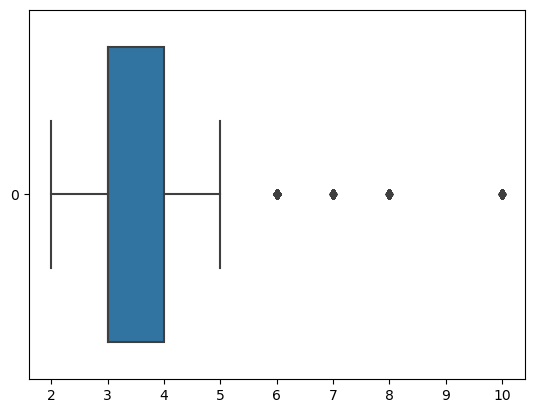

In [32]:
sns.boxplot(df1["tenure"], orient="h");

In [33]:
# Select the rows without outliers in `tenure` and save resulting dataframe
lower_limit, upper_limit = find_boundaries(df_encoded, "tenure")

# df_logreg = df_encoded[(df_encoded["tenure"] >= lower_limit) & (df_encoded["tenure"] <= upper_limit)]
# df_logreg
outliers = np.where(df_encoded["tenure"] > upper_limit, True,
                   np.where(df_encoded["tenure"] < lower_limit, True, False))

# Create a dataframe of the outliers
outliers_df = df_encoded.loc[outliers, "tenure"]

# Select row without outliers in `tenure` and save the result in a new df
df_reg = df_encoded.loc[~outliers]
df_reg.head()

Lower limit: 1.5
Upper limit: 5.5


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

### <a id="train_test_split">Modeling<a/>


Isolate the outcome variable, and select the features to use in the model

In [34]:
# Isolate the outcome variable

y = df_reg["left"]

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Next, Select the features to use in the model. Refering the my PACE document and EDA, for the first iteration of the model, I will be using all the variables out dataset.

In [35]:
# Select all the features but `left`
X = df_reg.drop("left", axis=1)

# Display the first few rows of the selected features
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

Split the data into training and testing set. Because of the observed imbalance shown in the plot above, setting the Stratify parameter based on the values of the claass of `y` is a good choice.


In [36]:
# Split the data into training set and testng set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [37]:
# Construct a logistic regression model and fit the model

model = LogisticRegression(random_state=0, max_iter=500)


log_clf = model.fit(X_train, y_train)

In [38]:
# Use logistic regression to get predictions on the test data
y_pred = log_clf.predict(X_test)


Create a confusion matrix to visualize the results of the logistic regression model

<a id='lr'></a>

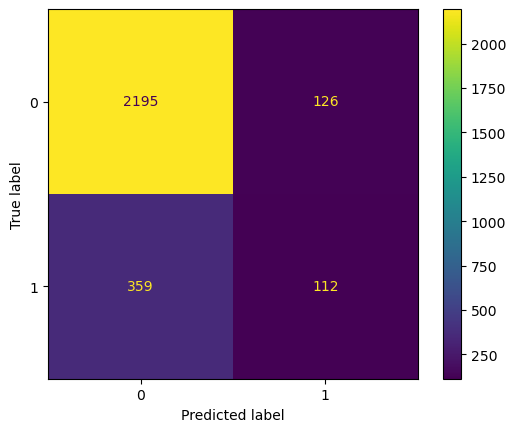

In [39]:
# Compute tthe value of the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create dispay of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)

# Plot confusion matix
cm_disp.plot(values_format="")

# Display plot
plt.show();

The upper quadrant displays the number of true negatives: The number of employee who stayed that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of employees who stayed that the model misclassified as employee who left.

The lower-left quadrant displays the number of false negatives: the number of employees who left that the model misclassified as employee who stayed.

The lower-right quadrant displays the number of true positives: the number of employees who left that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. Clearly this is not the case with our model.

Create a classification report that includes precision, recall, f1-score and accuracy metrics to evaluate the performance of the logistic regression model.


Check the class balance in the data. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

0    0.831468
1    0.168532
Name: left, dtype: float64


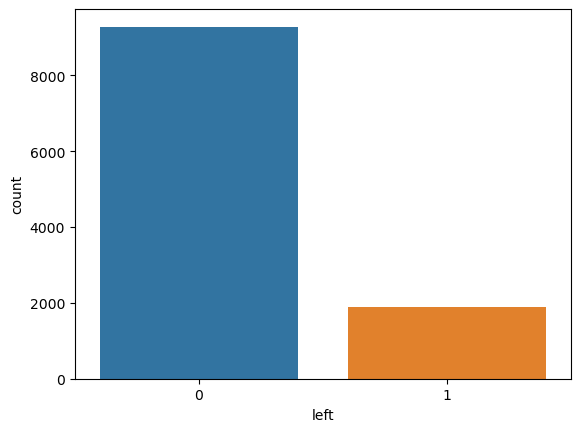

In [40]:
# Check for data imbalance within the output variable
print(y.value_counts(normalize=True))

# Display the class imbalance in the outcome variable
sns.countplot(data=df_reg, x=y);



While there is no universally agreed-upon threshold for what constitutes "very severe" class imbalance, a commonly used guideline is when the ratio between the minority and majority classes is greater than 1:10 or 1:20. In our case, the plot shows a class imbalance but in the range where it should be considered to be extreme. There is approximately 83%:17% split.  If it was more severely inbalance, there is need to resample the data to make it more balance.

In [41]:
target_labels = ["Stayed(Would not leave)", "Left (Would leave)"]
print(classification_report(y_test, y_pred, target_names=target_labels))

                         precision    recall  f1-score   support

Stayed(Would not leave)       0.86      0.95      0.90      2321
     Left (Would leave)       0.47      0.24      0.32       471

               accuracy                           0.83      2792
              macro avg       0.67      0.59      0.61      2792
           weighted avg       0.79      0.83      0.80      2792



The classification report shows that the logistic regression model acheived a precision of 47% and a recall of 24%, and it acheived an accuracy of 83%. Note that the precision and recall scores are taken from the "left" class(row) of the output because our goal is to predict employee who leaves. The scores are significantly low.


Next step, would to try out some optimization technique by setting the `class_weight` paramater of the model to "balanced" and see if it improves the model measurement metrics.

In [42]:
model1 = LogisticRegression(random_state=0, max_iter=500, class_weight="balanced")
log_clf_1 = model1.fit(X_train, y_train)
y_pred_1 = log_clf_1.predict(X_test)


target_labels = ["Stayed(Would not leave)", "Left (Would leave)"]
print(classification_report(y_test, y_pred_1, target_names=target_labels))

                         precision    recall  f1-score   support

Stayed(Would not leave)       0.98      0.82      0.89      2321
     Left (Would leave)       0.51      0.91      0.66       471

               accuracy                           0.84      2792
              macro avg       0.75      0.87      0.77      2792
           weighted avg       0.90      0.84      0.85      2792



The classification report above shows that the logistic regression model perfomed better. We achieved a precision of 51%, recall of 91%, f1-score of 66% for the target class `Left (Would leave)`, and accuracy of 84%. This is compareably better than the previous model. 

Next, lets plot the confusion matrix

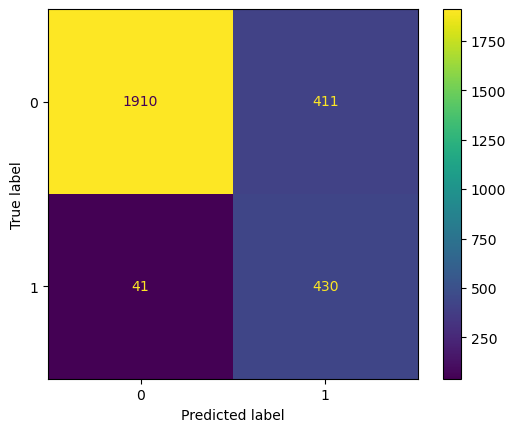

In [43]:
# Compute tthe value of the confusion matrix
cm_1 = confusion_matrix(y_test, y_pred_1, labels=log_clf_1.classes_)

# Create dispay of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=log_clf_1.classes_)

# Plot confusion matix
cm_disp.plot(values_format="")

# Display plot
plt.show();

The plot show an improvement in lower right quadrant-the number of True positive. ie the number of employees who left that model correctly predicted. This is as a result of the improved `recall_score`, 91% compared to 24% previously.

Next, would be to calculate the true positive rate and false positive rate and create ROC curve using Matplotlib.

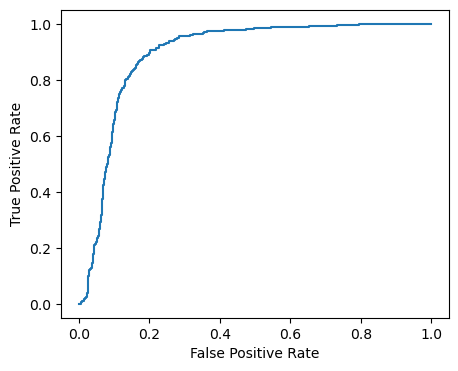

In [44]:
y_pred_proba = log_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


#create ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

As we can see, the model a pretty good job at classifying employees to left or stay.
To quantify this, we can calculate the AUC - area under the curve - which tells us how much of the plot is under the curve. 

The closer AUC is  to 1, the better the model. A model with an AUC of 0.5 or less is no better than a model that makes a random classification.

Next, let's calculate the AUC


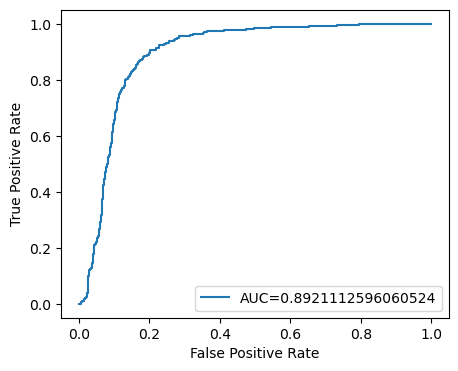

In [45]:
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC for this logistic regression model turns out to be 0.892. Since this is close to 1, this confirms that the model does a pretty good job classifying the categories of employees who will stay or leave the company.

Next step would be to interpret the model coefficients

In [46]:
# Get the feature names from the model and model coefficients (which represents log-odds ratios)
# place inot a  DataFrame from readability
pd.DataFrame(data={"Features Name": log_clf.feature_names_in_, "Model Coefficients": log_clf.coef_[0]})

Features Name  Model Coefficients
0       satisfaction_level           -4.445759
1          last_evaluation           -0.127922
2           number_project           -0.444212
3    average_monthly_hours            0.003254
4                   tenure            1.027789
5            work_accident           -1.474265
6    promotion_last_5years           -0.518467
7                   salary           -0.501761
8            department_IT           -0.053127
9         department_RandD           -0.363387
10   department_accounting           -0.192300
11           department_hr            0.050279
12   department_management           -0.172021
13    department_marketing           -0.067794
14  department_product_mng           -0.114191
15        department_sales            0.027893
16      department_support           -0.043767
17    department_technical            0.013981

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest

#### Create the training and testing data 

Put 75% of the data into a training set and the reamaining 25% into a testing set


In [47]:
y = df_encoded["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Select the features**

In [48]:
# Select the features
X = df_encoded.drop("left", axis=1)

# Display the first few rows
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [49]:
# Split the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Decision tree - First iteration

Construct a decision tree model and set up cross-validated grid-search to exhaustively  search the best model parameters

In [50]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

cv_params = {"max_depth": [4, 6, 8, None ],
            "min_samples_leaf": [1, 3, 5],
            "min_samples_split": [2, 4, 6]}

# Assign a dictionary of scoring metrics to capture 
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate Gridsearch
tree1 = GridSearchCV(decision_tree,
                     cv_params,
                     scoring=scoring,
                     cv=4,
                     refit="roc_auc")



In [51]:
%%time
# fit the decision
tree1.fit(X_train, y_train)

CPU times: user 3.81 s, sys: 116 ms, total: 3.92 s
Wall time: 4.08 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'f1', 'recall', 'roc_auc'})

Identify the optimal values for the decision tree parameters

In [52]:
# Check the best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

Identify the best AUC scores acheived by the decision tree model on the training set


In [53]:
tree1.best_score_

0.9688735287591919

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, write a function that will extract all the scores from the grid search`

In [54]:
def make_results(model_name:str, model_object: tree1, metric:str) -> pd.DataFrame:
    """
    Extract all scores from the grid search
    
    Parameters
    ----------
    model_name : str
        Name of the model to be called in the output table.
    model_object : tree1
        A fit GridSearchCV object.
    metric : str
        Metric to be used for evaluation. Options are 'precision', 
        'recall', 'f1', 'accuracy', or 'auc'.
  
    Returns
    -------
    pandas.DataFrame
        A DataFrame with the F1, recall, precision, accuracy, and 
        auc scores for the model with the best mean 'metric' score 
        across all validation folds.  
    
    """
    
    # Get all the results from the CV and put them in a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the dataframe with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results["mean_test_f1"].idxmax(), :]
    
    # Extract accuracy, precision, recall and f1 score from the row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc
    
    # Create table of result
    table = pd.DataFrame({"Model": [model_name],
                         "F1": [f1],
                         "recall": [recall],
                         "precision": [precision],
                         "accuracy": [accuracy], 
                         "auc": [auc]})
    return table

 Use the function to get all the scores from the grid search

In [55]:
# Get all CV scores
tree1_cv_results = make_results("Decision tree cv", tree1, "auc")
tree1_cv_results

Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496

All the scores from the decision tree model are strong indicators of a good model performance.

Next we plot the 'best' decision tree



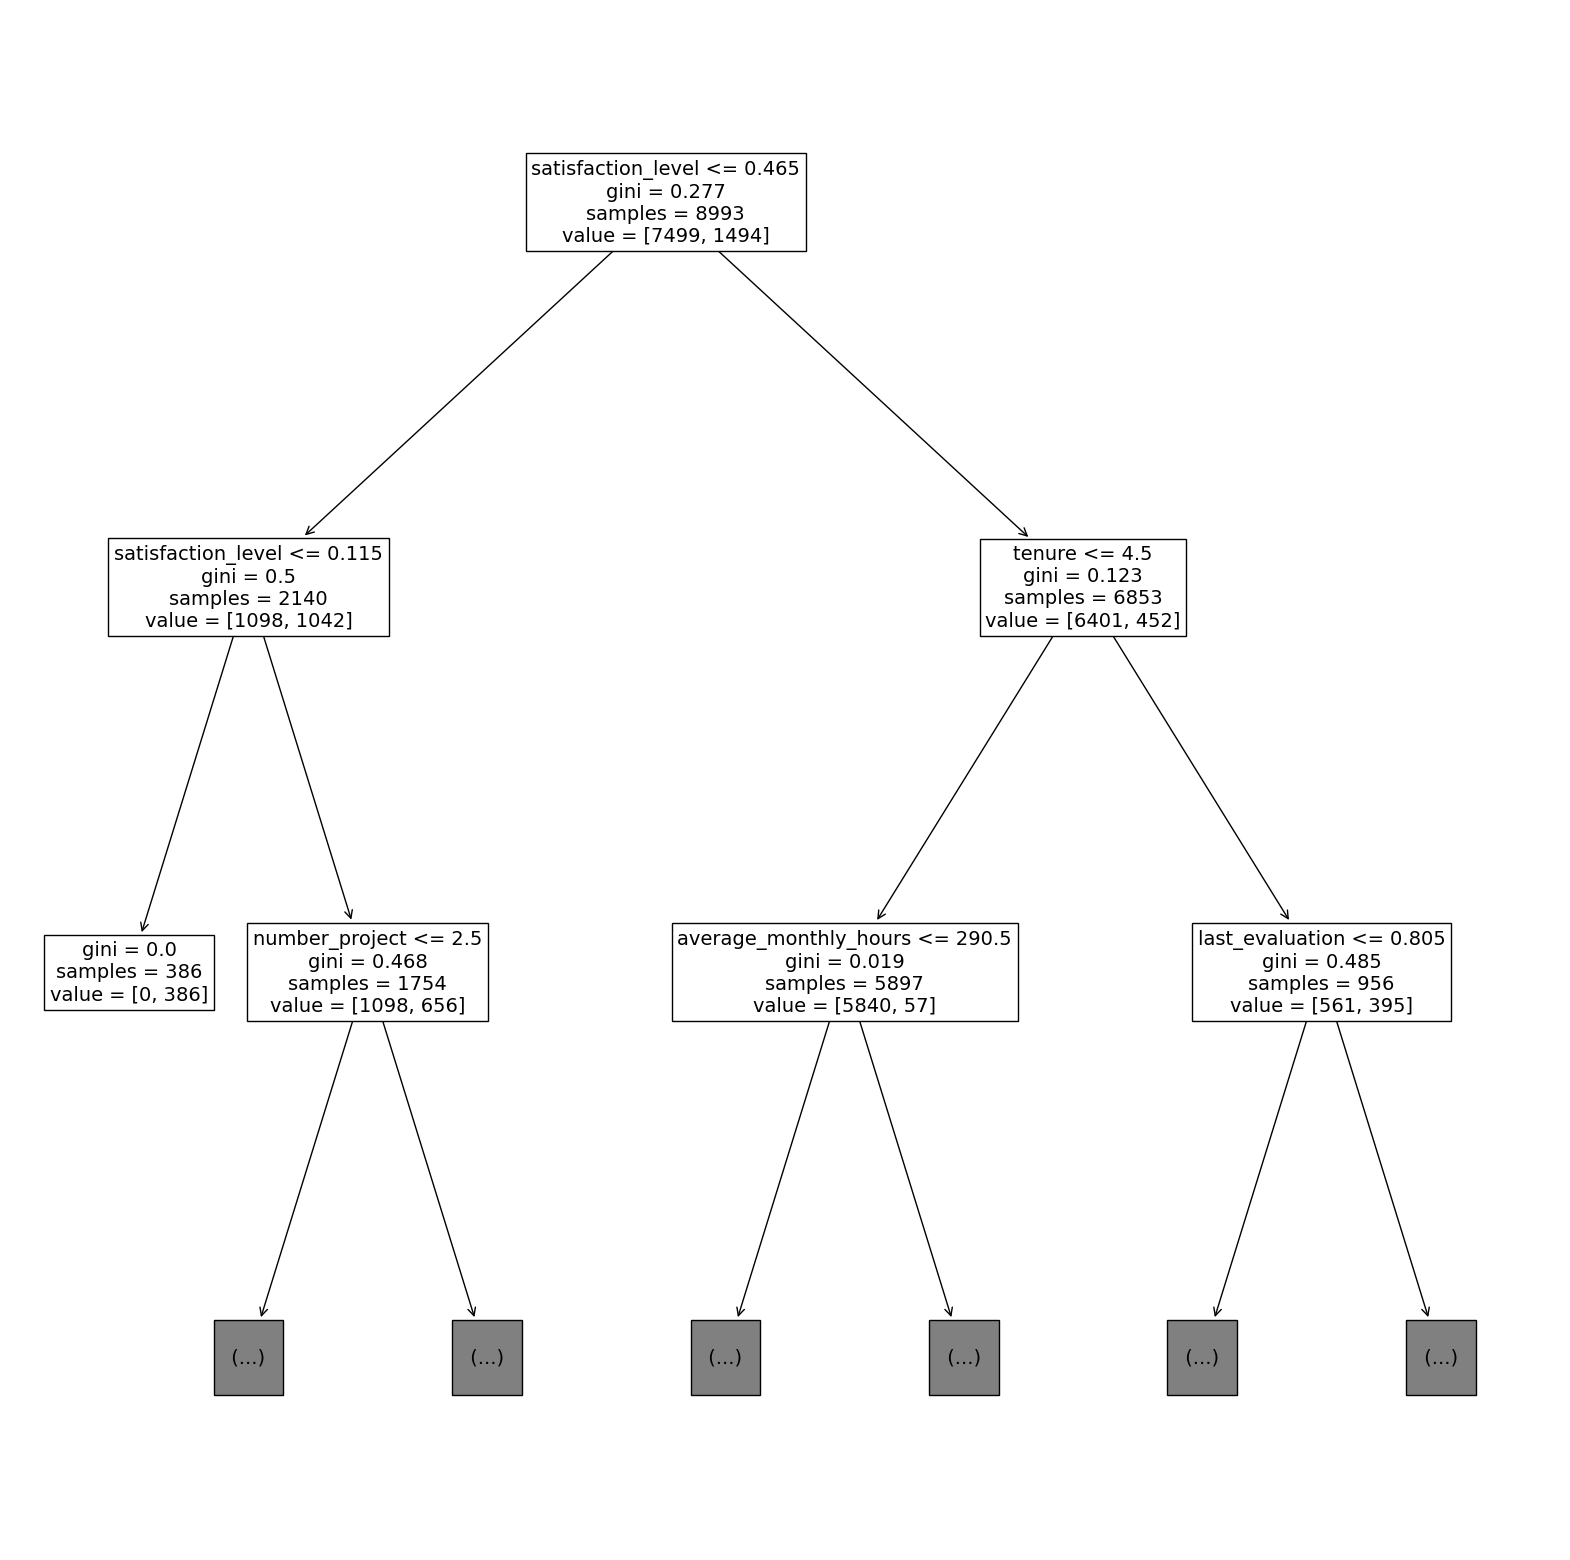

In [56]:
plt.figure(figsize=(20,20))
plot_tree(tree1.best_estimator_, max_depth=2,fontsize=14, feature_names=X.columns );

The visualization of the decison tree makes it seems like `satisfaction_level`, `average_monthly_hours` `number_project` and `tenure` are among the most important features.


Because we are aware that decision trees are suscetptible to overfitting, and random forest avoids overfitting by incorporating multiple trees to make predictions. 


Next, lets contruct a Random Forest Model

#### Random Forest - First Iteration

In [57]:
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [4, 6, 8, None ],
             "max_features" : [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4],
             "n_estimators": [500]}

# Assign a dictionary of scoring metrics to capture 
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate Gridsearch
rf1 = GridSearchCV(rf,
                   cv_params,
                   scoring=scoring,
                   cv=4,
                   refit="roc_auc")


Fit the random forest to the training data

In [120]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 15min 8s, sys: 15 s, total: 15min 23s
Wall time: 38min 19s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'precision', 'f1'})

In [121]:
# Define a path to the folder where you want to save the model

path = "models/"

Define functions to pickle the model and read in the model

In [122]:
def write_pickle(path: str, model_object, save_as:str):
    """Save the trained model using pickle
    
    Parameter
    ---------
    path: str
        Path of folder to save the pickle
    model_object: Model
        A model to be pickled
    save_as: str
        Filename for hwo to save the model
    
    Return:
        A call to pickle the model in the folder indicated
    """
    with open(path + save_as + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

In [123]:
def read_pickle(path:str, saved_model_name: str):
    """Read the saved pickled model
    
    Paramaters
    ----------
    path: str
        Path of folder to read saved model from
    saved_model_name: str
        Filename of pickled model to read in
        
    Return
    ------
    model: The pickled model
    """
    with open(path + saved_model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
    return model

Use the functions above to save the model in a pickle file and then read it in

In [124]:
# Write pickle
write_pickle(path, rf1, "hr_rf1")

In [125]:
# Read pickle
rf1 = read_pickle(path, "hr_rf1")

Identify the best AUC score acheived by the randome forest model on the training set

In [126]:
# Check best AUC score on CV
rf1.best_score_

0.9650803448457131

Identify the optimal values for the parameters of the random forest

In [127]:
# Check the best params
rf1.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [128]:
# Get the CV scores
rf1_cv_results = make_results("random forest cv", rf1, "auc")
print(tree1_cv_results)
print(rf1_cv_results)

              Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496
              Model        F1    recall  precision  accuracy       auc
0  random forest cv  0.898913  0.899532   0.898341  0.966419  0.961374


The evaluation scores of the random forest model is better than those of the decision tree model. This indicates that the random forest outperformed the decision tree model.


Next, lets evaluate the final model on the test set.


Define a function that gets all the scores from a models predictions.

In [129]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    """Generate a table of test scores
    
    Parameters
    ----------
    model_name:str
        A choosen name to represent the model on the table
    model: 
        A fit GridSearchCV object
    X_test_data:array
        Numpy array of X_test data
    y_test_data: array
        Numpy array of y_test data
        
    Return
    ------
    table: pd.DataFrame
        Dataframe of precision, recall, f1, accuracy, and AUC scores for the model"""
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)    
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({"model": [model_name],
                         "accuracy": [accuracy],
                         "precision": [precision],
                         "recall": [recall],
                         "f1": [f1],
                         "AUC": [auc]})
    return table

Use the best performing model to predict on the test data

In [130]:
rf1_test_scores = get_scores("randoom forest1 test", rf1, X_test, y_test)
rf1_test_scores

model  accuracy  precision    recall        f1       AUC
0  randoom forest1 test  0.963642   0.883629  0.899598  0.891542  0.937999

The test scores are very similar to the train scores, which is good.

However, because this performance seems a little too good to be true, I have my doubts about the metric scores. I suspect there might be data leakage- information from outside the training dataset is used to create the model- occuring within out pipeline.

**Instances of data leakage**:
- when the data we are using to train a machine learning algorithm happens to have the information we are trying to predict.
- if any other feature whose value would not actually be available in practice at the time you’d want to use the model to make a prediction, is a feature that can introduce leakage to your model

#### Feature Engineering

Considering, their is a suspection around data leakage. Lets dig in. 

In this case, its likely that the company won't have satisfiction levels reported for all its employees. It is also possible that the `average_monthly_hours` feature is a source of some data leakage. If the employees have already decided upon quitting, or have already been identfied by management as people to be fired, they may be working fewer hours. 

The first iteration of the decision tree and random forest models included all variables as features. The next round will incorporate feature engineering to build improved models.

Since when this model is in production `satisfaction_level` might not avialable for some employees as they might noe responded to the survey question, we should proceed to drop it. Additionally, create a new feature called `overworked` to capture if an employee is overworked. It will be a binary variable.

In [131]:
# Drop `satisfaction_level`

df2 = df_encoded.drop('satisfaction_level', axis=1)

df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [132]:
# Create `overworked` column.
df2["overworked"] = df2["average_monthly_hours"]

# Inspect max and min average monthy hours values
print(f"Max hours : {df2['overworked'].max()}")
print(f"Min hours : {df2['overworked'].min()}")

Max hours : 310
Min hours : 96


We already learned that 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days a week, 8 hours per day.

I will defined being overworked as working more than 170 hours per month on average.



In [133]:
# Define `overworked` as working > 170 hrs/month
df2["overworked"] = (df2["overworked"] > 170).astype(int)

df2["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Drop the `average_monthly_hours` column

In [134]:
# Drop the `average_monthly_hours`
df2 = df2.drop("average_monthly_hours", axis=1)

# Display first few rows for resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

In [135]:
# Isolate the outcome variable
y = df2["left"]

# select the features
X = df2.drop("left", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Second Iteration

In [136]:
# Instatiate the Decison tree model

decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hypyparameters to search over 
cv_params = {"max_depth": [6, 8, 10, None],
            "min_samples_leaf": [2, 3, 5,1],
            "min_samples_split": [2, 4, 6, 8]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate GridSearch
tree2 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [137]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 5.89 s, sys: 161 ms, total: 6.05 s
Wall time: 6.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10, None],
                         'min_samples_leaf': [2, 3, 5, 1],
                         'min_samples_split': [2, 4, 6, 8]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'f1', 'recall', 'roc_auc'})

In [138]:
# Checkthe best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [139]:
# Check the best AUC score on CV
tree2.best_score_

0.9583665988062298

This model performs very well, even without the satisfaction levels and detailed hours worked data

Next check the other scores

In [140]:
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496
               Model        F1    recall  precision  accuracy       auc
0  decision tree2 cv  0.891509  0.889482    0.89369  0.964083  0.953286


We can observe a fall in the scores of all the metrics compared to the first model. This is to be expected as we used less features in this model. The scores are still good.

#### Random Forest - Second iteration

In [141]:
# Instantiate the Random Forest
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary to hyperparameters to search over
cv_params = {"max_depth": [2,3,5,8, None],
            "max_features": [1.0],
            "max_samples" : [0.7, 1.0],
            "min_samples_leaf": [1,2,3],
            "min_samples_split": [2,3,4],
            "n_estimators": [500]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, verbose=1, cv=4, refit="roc_auc")

In [142]:
%%time
rf2.fit(X_train, y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
CPU times: user 16min 13s, sys: 15.4 s, total: 16min 29s
Wall time: 17min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 5, 8, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'f1', 'recall', 'roc_auc'},
             verbose=1)

In [143]:
# Write pickle
write_pickle(path, rf2, "hr_rf2")

In [144]:
# Read best params
rf2 = read_pickle(path, "hr_rf2")

In [145]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [146]:
# Check best AUC score on CV
rf2.best_score_

0.9646932163457633

In [147]:
# Get all CV scores
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               Model        F1    recall  precision  accuracy       auc
0  decision tree2 cv  0.891509  0.889482    0.89369  0.964083  0.953286
               Model        F1    recall  precision  accuracy       auc
0  random forest2 cv  0.898913  0.899532   0.898341  0.966419  0.961374


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now

In [148]:
# Get predictions on test data
rf2_test_scores = get_scores("random forest2 test", rf2, X_test, y_test)
rf2_test_scores

model  accuracy  precision   recall        f1       AUC
0  random forest2 test  0.959973   0.866279  0.89759  0.881657  0.934995

This seems to be a stable, well-performing final model.

PLot a confusion matrix to visualize how well it predicts on the test set.

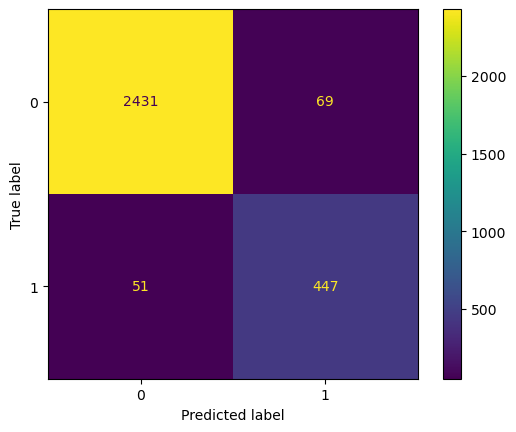

In [149]:
# Generate array of values for confusion matrix

preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format="");

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is a better model compared to the [logistic regression model.](#lr)

For exploratory purpose, let inspect the splits of the decision tree model and the most import featuresin the random forest model.

#### Decision tree splits

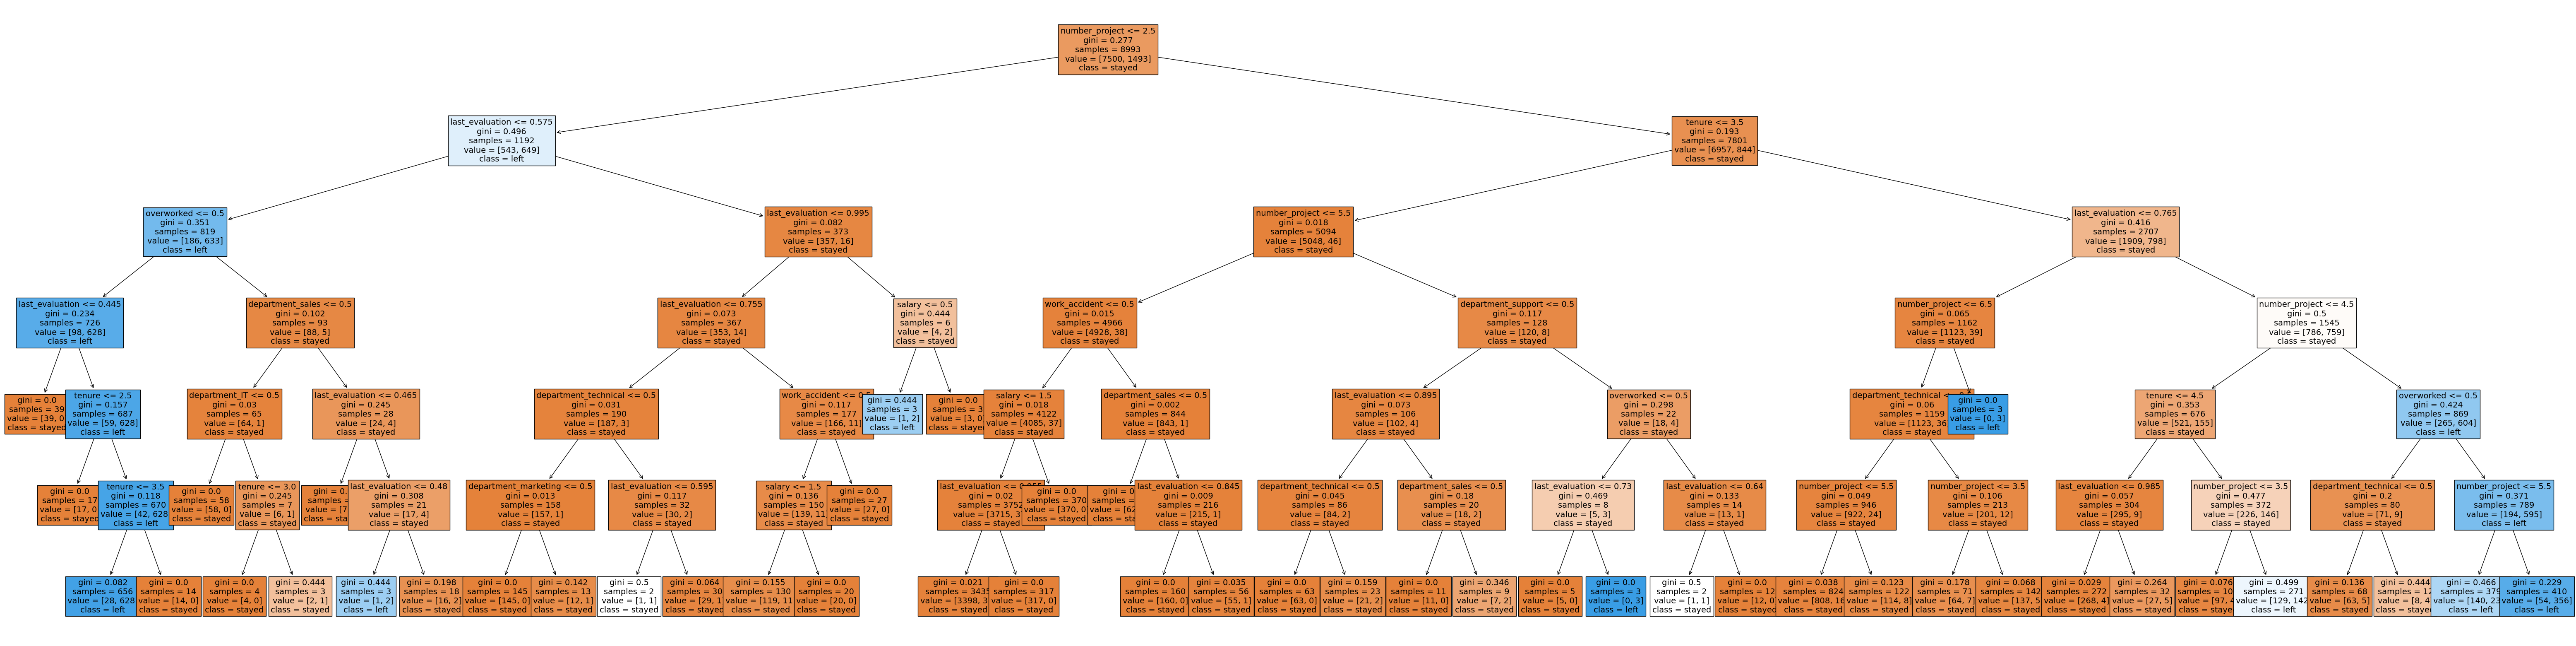

In [150]:
# Plot the tree
plt.figure(figsize=(80,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
         class_names={0:"stayed", 1:"left"}, filled=True);
plt.show()

#### Decision tree feature importances

In [151]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.344443
number_project               0.344235
tenure                       0.214199
overworked                   0.093587
department_technical         0.001179
salary                       0.000911
department_sales             0.000626
department_support           0.000418
work_accident                0.000183
department_IT                0.000141
department_marketing         0.000078

Create a barplot to visualize the decision tree features importances

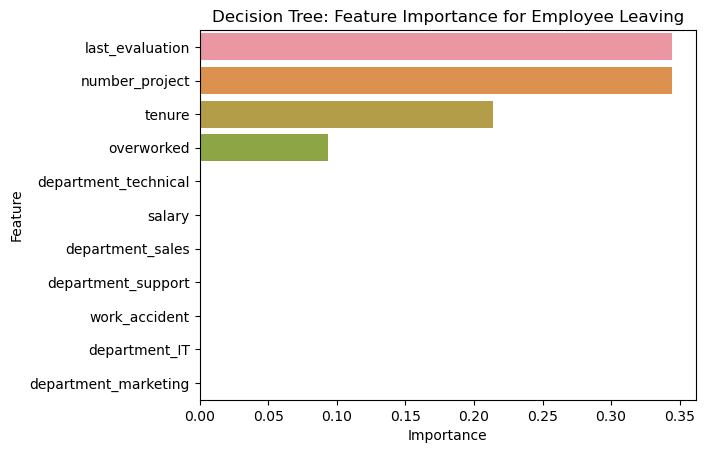

In [152]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient="h")
plt.title("Decision Tree: Feature Importance for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree modes, 
- `last_evaluation`, 
- `number_project`
- `tenure`
- `overworked` have the highest importance, in that order. 

These variables are most helpful in predicting the outocme varibale `left`

#### Random forest feature importance

Now, lets plot the feature importances for the Random Forest Model

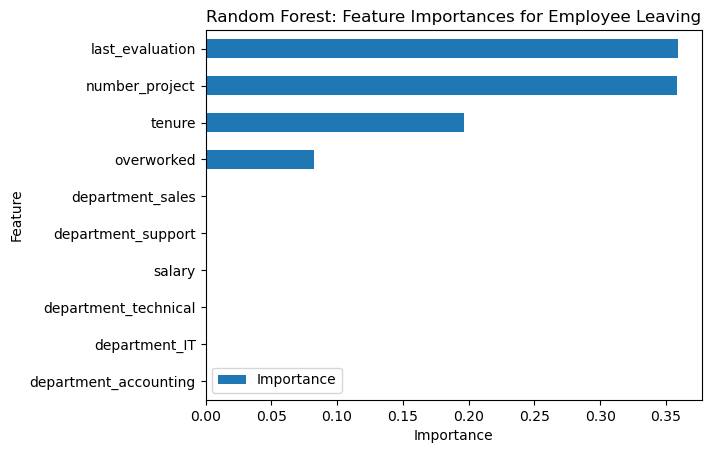

In [153]:
# Get feature importances 
feature_importance = rf2.best_estimator_.feature_importances_

# Get indices of top 10 figures
idx_top_ten = np.argpartition(feature_importance, -10)[-10:]

# Get the column labels of the top 10 features
feat = X.columns[idx_top_ten]


# Filter `feature_importance` to consist of top 10 feature importance
feature_importance = feature_importance[idx_top_ten]

y_df = pd.DataFrame({"Feature":feat,"Importance":feature_importance})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above show that in the random forest model, `last_evaluation`, `number_project`, `tenure`, `overworked` have the highest importance, in that order.  These varirables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model performed poorly in predicting the class we are interested in - if an employee will leave. Though the overall measurement metrics are above average

**Tress-based Machine Learning**

After conducting feature engineering to ensure robustness of the model, the decision tree acheived AUC of 93.8%, precision of 87%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company overworked.

To retain employees, the following recommendation could be presented to the stakeholders:

- High evaluation score should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employee who contributed more
- Either reward employee for working longer hours, or don't require them to do so.
- Consider promotting employees who have been with the company for atleast 4 years, or conduct further investigation about why 4 yeart tenures are so dissatisfied.
- Cap the number of projects that employees can work on.

**Next Steps**

Given the model we have, it wouldn't unreasonable to have some concerns about data leakage. Considering `last_evaluation` metric might not be available for all employee when the model is in production, it could be a good idea to drop the feature.

Next, explore building a K-means model on this data and analyzing the clusters. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.